# Viewing JWST Spectra with Spectral DB and Specviz Solutions

## Imports

In [1]:
%matplotlib inline
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import requests
from astroquery.mast import Observations
from specutils import Spectrum1D
from jdaviz import Specviz
import astropy.units as u
from astropy.nddata import StdDevUncertainty

## Searching for JWST spectra with given pixel parameters

### Exercises

1. Review the "Search Syntax" section of the [Search Spectroscopic Pixel Data](https://mast.stsci.edu/spectra/docs/search_pixels.html) documentation and make a request for a list of all spectral data products (aggregated by filename) with the following criteria: 1D spectra, with flux greater than or equal to 5 Jy, for wavelengths *less than* 15 microns, with a quality flag equal to 0, from the MIRI instrument. 

2. Confirm that the number of spectral products returned in query `r1a` are the same as those returned in query `r1b`.

In [2]:
# Solution to Exercise 1
r1c=requests.get('https://mast.stsci.edu/spectra/api/v0.1/search?product=x1d&wavelength.lt=15&flux.gte=5&instrument=MIRI&quality=0&group=True')
r1c.json()['results'] # Note the results of the solution will change with time.

[{'fileName': 'jw01022-o023_t001_miri_ch1-short_x1d.fits'},
 {'fileName': 'jw01022-o023_t001_miri_ch2-short_x1d.fits'},
 {'fileName': 'jw01022-o023_t001_miri_ch3-short_x1d.fits'},
 {'fileName': 'jw01047-o001_t006_miri_ch1-long_x1d.fits'},
 {'fileName': 'jw01047-o001_t006_miri_ch2-long_x1d.fits'},
 {'fileName': 'jw01047-o001_t006_miri_ch2-medium_x1d.fits'},
 {'fileName': 'jw01047-o001_t006_miri_ch2-short_x1d.fits'},
 {'fileName': 'jw01047-o001_t006_miri_ch3-medium_x1d.fits'},
 {'fileName': 'jw01047-o001_t006_miri_ch3-short_x1d.fits'},
 {'fileName': 'jw01244-c1002_t003_miri_ch1-shortmediumlong-_x1d.fits'},
 {'fileName': 'jw01244-c1002_t003_miri_ch2-shortmediumlong-_x1d.fits'},
 {'fileName': 'jw01244-c1002_t003_miri_ch3-shortmediumlong-_x1d.fits'},
 {'fileName': 'jw01244-o024_t003_miri_ch1-shortlongmedium-_x1d.fits'},
 {'fileName': 'jw01244-o024_t003_miri_ch2-shortlongmedium-_x1d.fits'},
 {'fileName': 'jw01244-o024_t003_miri_ch3-shortlongmedium-_x1d.fits'},
 {'fileName': 'jw01261-c1001_t0

In [3]:
# Before we can do Exercise 2, we must load in variables from the tutorial.
prefix='https://mast.stsci.edu/spectra/api/v0.1/search?'
keywords='product=x1d&wavelength=14,14.5&derSnr.gt=5&flux.gte=0.2&columns=targetName,targetRA,targetDec'
url=prefix+keywords
r1a=requests.get(url)
lenr1a=len(r1a.json()['results'])
prefix='https://mast.stsci.edu/spectra/api/v0.1/search?'
keywords='product=x1d&wavelength=14,14.5&derSnr.gt=5&flux.gte=0.2&group=True'
url=prefix+keywords
r1b=requests.get(url)
# Solution for Exercise 2
allfilenames=[]
for i in range(0,lenr1a): allfilenames.append(r1a.json()['results'][i]['fileName']) # Admittedly inefficient.
uniquefilenames=np.unique(allfilenames)
print(uniquefilenames)
print(r1b.json()['results'])

['jw01039-c1000_t001_miri_ch3-shortmediumlong-_x1d.fits'
 'jw01039-o005_t001_miri_ch3-shortlongmedium-_x1d.fits'
 'jw01047-o001_t006_miri_ch3-medium_x1d.fits'
 'jw01050-o005_t005_miri_ch3-medium_x1d.fits'
 'jw01244-c1002_t003_miri_ch3-shortmediumlong-_x1d.fits'
 'jw01244-o024_t003_miri_ch3-shortlongmedium-_x1d.fits'
 'jw01246-o004_t002_miri_ch3-longshortmedium-_x1d.fits'
 'jw01328-c1006_t014_miri_ch3-longshortmedium-_x1d.fits'
 'jw01328-c1007_t023_miri_ch3-shortlongmedium-_x1d.fits'
 'jw01328-o015_t014_miri_ch3-mediumshortlong-_x1d.fits'
 'jw01328-o020_t023_miri_ch3-longmediumshort-_x1d.fits'
 'jw01349-c1004_t002_miri_ch3-longmediumshort-_x1d.fits'
 'jw01349-c1007_t004_miri_ch3-shortlongmedium-_x1d.fits'
 'jw01349-o001_t002_miri_ch3-longshortmedium-_x1d.fits'
 'jw01349-o002_t004_miri_ch3-mediumshortlong-_x1d.fits'
 'jw01349-o010_t003_miri_ch3-longmediumshort-_x1d.fits'
 'jw01373-c1006_t001_miri_ch3-shortmediumlong-_x1d.fits'
 'jw01373-o029_t031_miri_ch3-shortlongmedium-_x1d.fits'
 'jw0

## Using Spectral DB API to retrieve a JWST spectrum with known URI

### Exercises

3. Find the units of the wavelength and frequency columns from the column metadata in the JSON object and add axis labels to the plot. 

um
Jy


Text(0, 0.5, 'Flux (Jy)')

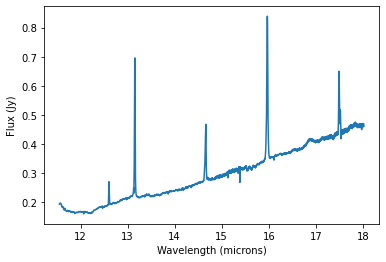

In [4]:
# Before we can do Exercise 3, we must load in variables from the tutorial.
filename='jw01039-o005_t001_miri_ch3-shortlongmedium-_x1d.fits'
prefix='https://mast.stsci.edu/spectra/api/v0.1/retrieve?uri='
uri='mast:JWST/product/'+filename
url=prefix+uri
r2=requests.get(url)
data=r2.json()['data']
# Solution to Exercise 3
print(r2.json()['column_metadata']['wavelength']['units'])
print(r2.json()['column_metadata']['flux']['units'])
plt.plot(data['wavelength'],data['flux'])
plt.xlabel('Wavelength (microns)')
plt.ylabel('Flux (Jy)')

## Viewing the Spectrum in Specviz

### Exercises

4. Download the file associated with this URI using the [`Astroquery` instructions for Downloading a Single File](https://astroquery.readthedocs.io/en/latest/mast/mast.html#downloading-a-single-file). Load the spectrum into Specviz, labeling it "From file", and confirm that the contents of the two spectra (from JSON and from file) are identical.

In [5]:
# In addition to the variables loaded for Exercise 3, we need to load a few more from the tutorial.
specviz = Specviz()
specviz.show()
wavelength=data['wavelength']*u.um
flux=data['flux']*u.Jy
error=StdDevUncertainty(data['fluxErr']*u.Jy)
spec1d=Spectrum1D(spectral_axis=wavelength,flux=flux,uncertainty=error) 
specviz.load_spectrum(spec1d,data_label="From JSON")
# Solution to Exercise 4
result=Observations.download_file(uri)
filename=uri.split('/')[-1]
print(filename)
specviz.load_spectrum('./'+filename,data_label="From File")
# Now "A" and "B" appear in Specviz and they are completely overlapping.

Application(config='specviz', events=['call_viewer_method', 'close_snackbar_message', 'data_item_remove', 'dat…

INFO:astroquery:Found cached file /Users/julia/GitHub/notebooks-stsci/notebooks/MAST/spectraldb_and_specviz/jw01039-o005_t001_miri_ch3-shortlongmedium-_x1d.fits with expected size 388800.


INFO: Found cached file /Users/julia/GitHub/notebooks-stsci/notebooks/MAST/spectraldb_and_specviz/jw01039-o005_t001_miri_ch3-shortlongmedium-_x1d.fits with expected size 388800. [astroquery.query]
jw01039-o005_t001_miri_ch3-shortlongmedium-_x1d.fits
